# Predicting Customer Churn at a Telcommunication Company

#### Scenario
A multinational telecommunication company wants to know why customers are churning.

#### Task
As a data scientist, I have been tasked with finding out the reasons behind customer chun and predicting future customer churn to help the marketing team use their budget wisely to target potential chuners.

Suedo Steps
1. Load in data
2. Clean and transform data 
    - Remove Null Values
    - Deal with Data types
        -convert columns to catergoical data type
    - Check/remove outliners in key metrics
    - drop unneccesary columns
    - feature engineer if neccessary
    - clean up column names
3. Explore data
    - statistical overview
        - Target variable
        - dependent variable
    - Correlation of input data to target variable
        - matrix 
        - heatmap
    - Distribution of values for key metrics
        - histogram plts
        - countplots
        - kernel density plots
4. Build Model
    - Feature Selection
    - Determine if OHE is necessary
    - Train test sets
    - standardize data if necessary
    - predict 
5. Interpret Results

Note: 

No Churn is 0

Churn is 1

In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Removes Warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
file_link = r"C:\Users\gerar\Documents\Data-Science-for-Marketing-Analytics-Second-Edition\Chapter07\Activity7.01\Telco_Churn_Data.csv"
df = pd.read_csv(file_link)
df.head()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [13]:
#checked the number of rows and columns
df.shape

(4708, 15)

In [14]:
# check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

#### Clean Data

In [15]:
print("Complaint Code")
print(f'Number of Rows: {len(df["Complaint Code"])}')
print(f'Number of Nulls: {df["Complaint Code"].isnull().sum()}')

Complaint Code
Number of Rows: 4708
Number of Nulls: 7


In [16]:
print("Percentage of Total Complaints")
df["Complaint Code"].value_counts()/len(df)

Percentage of Total Complaints


Billing Problem         0.617672
Call Quality            0.227273
Moving                  0.108539
Check Account           0.041419
Inaccurate Sales Inf    0.002761
Pricing                 0.000850
Name: Complaint Code, dtype: float64

The rows with null values in the feature "Complaint Code" will be replaced with the mode because the most common complaint appears 60 percent of time and is 40% more frequent than the next commmon complaint.

In [17]:
df["Complaint Code"].fillna("Billing Problem", inplace=True)

In [18]:
print(f'Number of Nulls: {df["Condition of Current Handset"].isnull().sum()}')
df["Condition of Current Handset"].value_counts()

Number of Nulls: 444


1.0    4186
2.0      74
3.0       4
Name: Condition of Current Handset, dtype: int64

The null values in the feature "conditon of current handset" will be replaced with the mode of the column because there are not enough nulls to warrant deleting the column and there are to many nulls to warrant deleting the rows without significantly reducing the size of the data.

Using the mode to replace missing values is the best choice because the value "1" has the over whelming majority of instances in the data. 

In [19]:
df["Condition of Current Handset"].fillna(1, inplace=True)

In [20]:
#confirming I dealt with the null values as intended
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4708 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [22]:
#change data type of categorical data to object data type
df["Condition_of_Current_Handset"] = df["Condition_of_Current_Handset"].astype('object')

df["Current_TechSupComplaints"] = df["Current_TechSupComplaints"].astype('object')


In [21]:
#rename columns
df.columns = df.columns.str.replace(" ", "_")

In [71]:
#delete redundant column
df = df.drop(axis=1, columns=["Target_Churn"])

### Exploratory Data Analysis

In [25]:
#inital statistical exploration of data
df.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,2.438828,10.811810,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,20.197292,8.710548,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,4.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,9.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,17.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,368.000000,39.000000,297.500000


The average current bill amount is $19,819.65 and the average account age is 26 months (2 years). The average amount of calls is 9,271, but the average increases if we only consider calls during the weekday. 

The average amount of days an account is delinquent is 14 days, with a min and max ranging from 0 to 126 days. 

In [29]:
df.describe(include="object")

,Target_Churn,Target_Code,Acct_Plan_Subtype,Complaint_Code,Current_TechSupComplaints,Condition_of_Current_Handset
count,4708,4708,4708,4708,4708,4708.0
unique,2,2,2,6,11,3.0
top,No Churn,0,Silver,Billing Problem,0,1.0
freq,2421,2421,3914,2915,3589,4630.0


#### Explore relationship between features

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Code,1.000000,0.019995,0.007375,-0.014987,-0.089890,-0.059899,0.460092,0.002891,0.042373,0.002611
Current_Bill_Amt,0.019995,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016852
Avg_Calls,0.007375,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.013441
Avg_Calls_Weekdays,-0.014987,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.013577
Account_Age,-0.089890,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.005059
Percent_Increase_MOM,-0.059899,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,-0.008848
Avg_Days_Delinquent,0.460092,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.000168
Current_Days_OpenWorkOrders,0.002891,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.029384
Equipment_Age,0.042373,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,-0.014347
Avg_Hours_WorkOrderOpenned,0.002611,0.016852,0.013441,0.013577,0.005059,-0.008848,0.000168,0.029384,-0.014347,1.000000


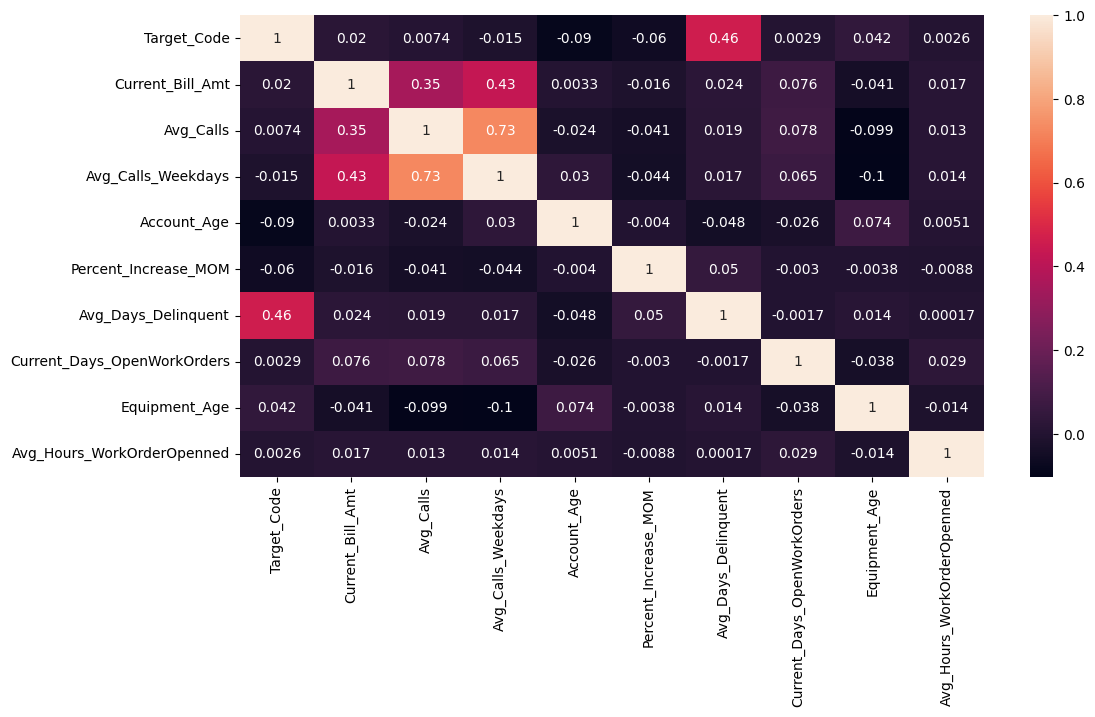

In [36]:
corr = df.corr()
plt.figure(figsize= (12,6))
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
corr

The heatmap above shows the column "Avg_Days_Delinquent" having a moderate postitive correlation to the target variable, which is the highest compared to all other independent features.

In [34]:
df["Target_Code"] = df["Target_Code"].astype("object")

df.groupby("Target_Code").mean()

,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Code,,,,,,,,,
0,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,2.382074,10.453119,0.913846
1,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,2.498907,11.191517,0.960482


The customers who churned had an average current bill of $20,176 and averaging 9354 calls per month, which is more than customers who did not churn. The average account age for a customer who churned was 25 months, which is slightly less than that of the other group. The most obvious difference between the two groups of customers was the average days with delinquent account, customers who churned had a staggering 19 days delinqeunt compared 9 days for customers who stayed. 

#### Univariate Analysis

Text(0, 0.5, 'No. Of Customers')

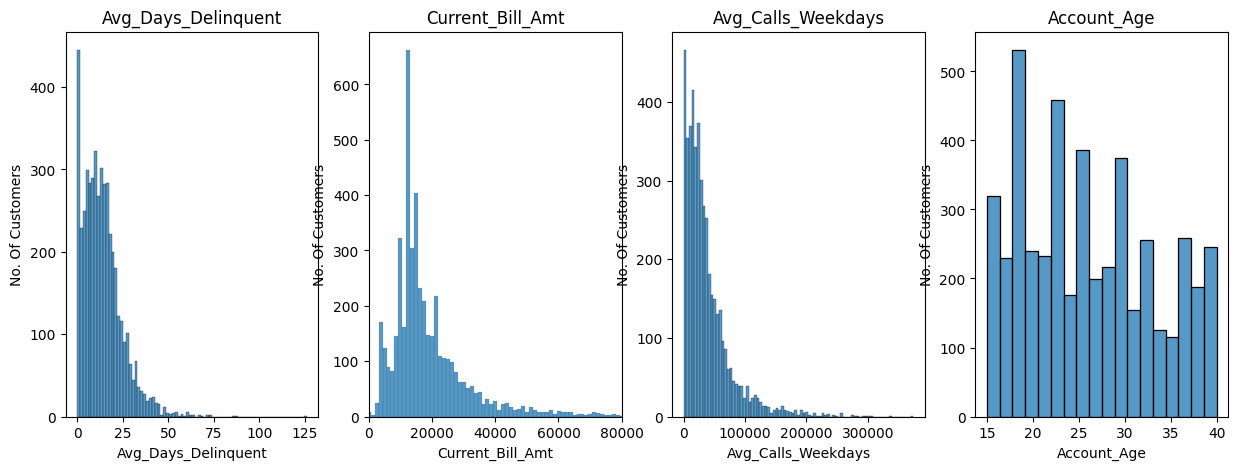

In [40]:
f, axes = plt.subplots(ncols=4, figsize= (15,5))

sb.histplot(df, x = "Avg_Days_Delinquent", ax=axes[0]).set_title("Avg_Days_Delinquent")
axes[0].set_ylabel("No. Of Customers")

sb.histplot(df, x = "Current_Bill_Amt", ax=axes[1]).set_title("Current_Bill_Amt")
axes[1].set_ylabel("No. Of Customers")
axes[1].set_xlim(left= 0, right=80000)

sb.histplot(df, x = "Avg_Calls_Weekdays", ax=axes[2]).set_title("Avg_Calls_Weekdays")
axes[2].set_ylabel("No. Of Customers")

sb.histplot(df, x="Account_Age", ax = axes[3]).set_title("Account_Age")
axes[].set_ylabel("No. Of Customers")


Text(0.5, 0, 'Equipment Age')

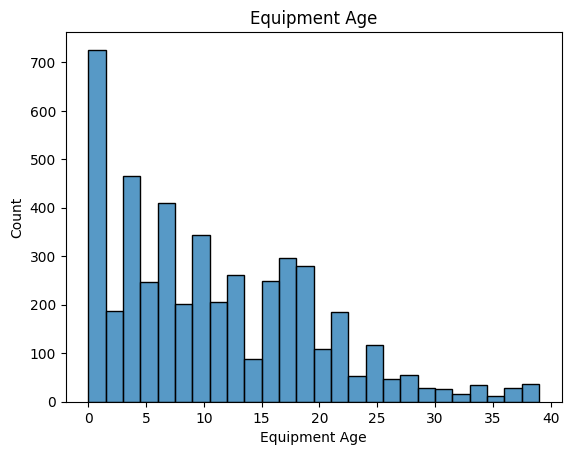

In [43]:
sb.histplot(df, x = "Equipment_Age")
plt.title("Equipment Age")
plt.xlabel("Equipment Age")

#### Bivariate Analysis

Text(0.5, 1.0, 'Types of Complaint By Customer')

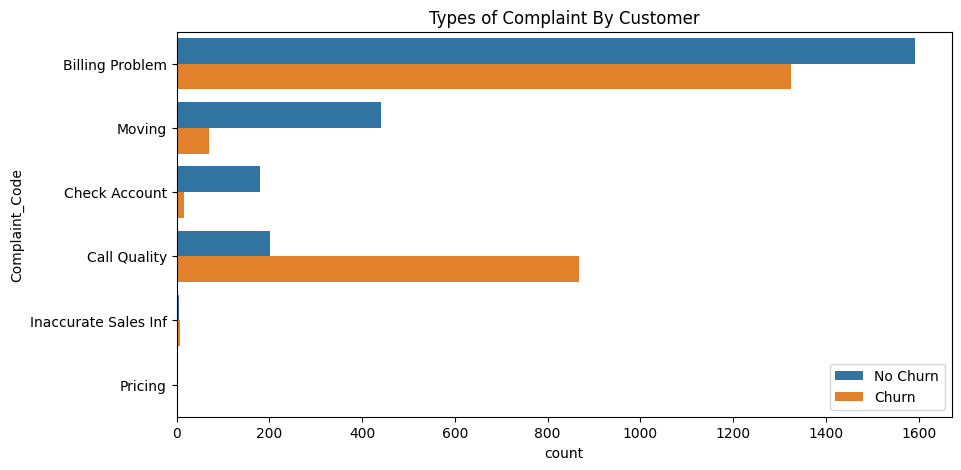

In [64]:
#avg days delinquent compared to churn and no churn
plt.figure(figsize=(10,5))
sb.countplot(df, y = "Complaint_Code", hue= "Target_Code")
plt.legend(["No Churn", "Churn"], loc = "lower right")
plt.title("Types of Complaint By Customer")

The two most common complaint types for customers who churn are complaints dealing with billing and call quality.

Text(0.5, 1.0, 'Account Plan Subtype')

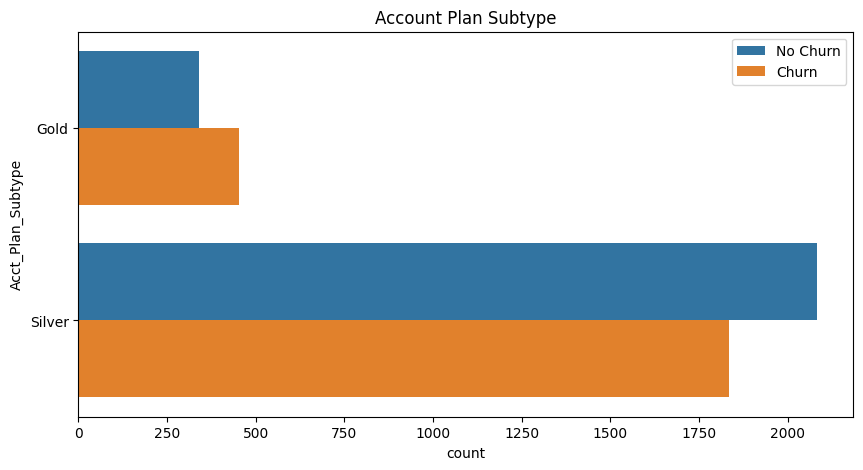

In [45]:
plt.figure(figsize=(10,5))
sb.countplot(df, y = "Acct_Plan_Subtype", hue="Target_Code")
plt.legend(["No Churn", "Churn"])
plt.title("Account Plan Subtype")

In the gold account plan more customers churn than customers who stay. Although, the more important insight is the majority of customers who churn have the silver account plan.

Text(0.5, 1.0, 'The distribution of observations')

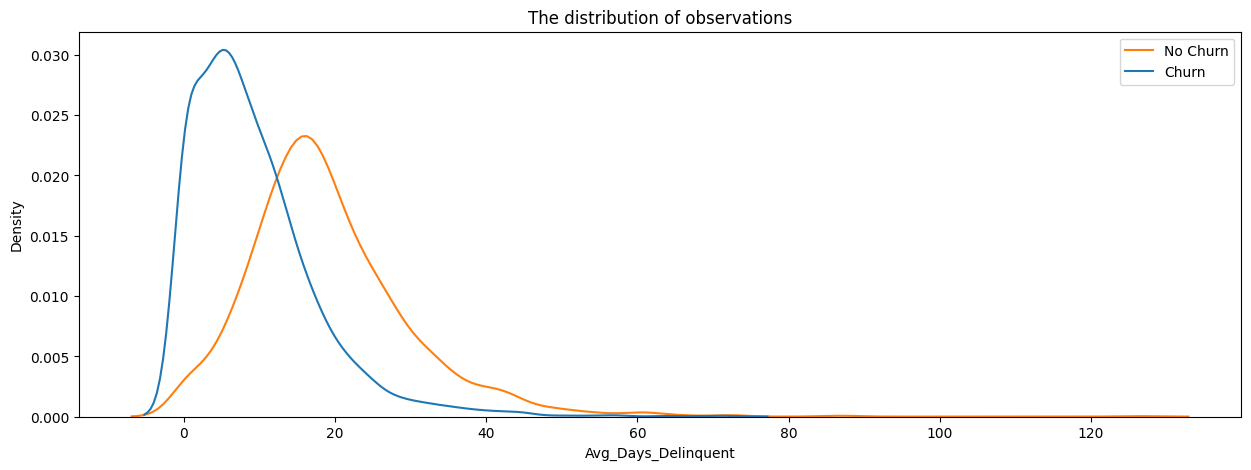

In [65]:
plt.figure(figsize = (15,5))
sb.kdeplot(df, x= "Avg_Days_Delinquent", hue="Target_Code")
plt.legend(["No Churn", "Churn"])
plt.title("The distribution of observations")

### Preprocessing

In [72]:
#convert object columns to category data types
df["Complaint_Code"] = df["Complaint_Code"].astype("category").cat.codes

df["Acct_Plan_Subtype"] = df["Acct_Plan_Subtype"].astype("category").cat.codes

In [73]:
#spilt data into x (independent variables) and y (target dependent variable)
y = df["Target_Code"].values.astype("int")
x = df.drop(axis=1, columns="Target_Code")

In [74]:
#create train and test sets for x and y data
#since we are building a supervised machine learning model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [75]:
#scale x data to make it easier for the model to learn and understand the problem
#if not scaled, the feature with a higher value range starts dominating when calculating distances
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Modeling

In [79]:
lgr = LogisticRegression().fit(x_train_scaled, y_train)
y_pred_1 = lgr.predict(x_test_scaled)

In [80]:
score_1 = lgr.score(x_test_scaled, y_test)

In [81]:
print(f"LogisticRegression Model Mean Accuracy Score: {score_1}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_1, squared=False)} ")

LogisticRegression Model Mean Accuracy Score: 0.7697536108751062
RMSE: 0.479839961992427 


In [82]:
#build Random Forest Classifier to perform logistic regression
rfc = RandomForestClassifier(random_state=42, n_estimators=100)

#fit/train model with training data
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred_2 = rfc.predict(x_test_scaled)

score_2 = rfc.score(x_test_scaled, y_test)

In [84]:
print(f"LogisticRegression Model Mean Accuracy Score: {score_2}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_2, squared=False)} ")

LogisticRegression Model Mean Accuracy Score: 0.7994902293967715
RMSE: 0.44778317364906484 


### Feature Selection

In [85]:
#use built in parameters of rfc to identify the importance of each feature
fi = rfc.feature_importances_

fi_series = pd.Series(fi, index= x.columns).sort_values(ascending=False)

fi_series

Avg_Days_Delinquent             0.269438
Percent_Increase_MOM            0.239001
Avg_Calls_Weekdays              0.090116
Avg_Calls                       0.081747
Current_Bill_Amt                0.081383
Complaint_Code                  0.072227
Account_Age                     0.063165
Equipment_Age                   0.060726
Current_TechSupComplaints       0.020743
Acct_Plan_Subtype               0.009512
Current_Days_OpenWorkOrders     0.006950
Avg_Hours_WorkOrderOpenned      0.003588
Condition_of_Current_Handset    0.001404
dtype: float64

Text(0, 0.5, 'Importance')

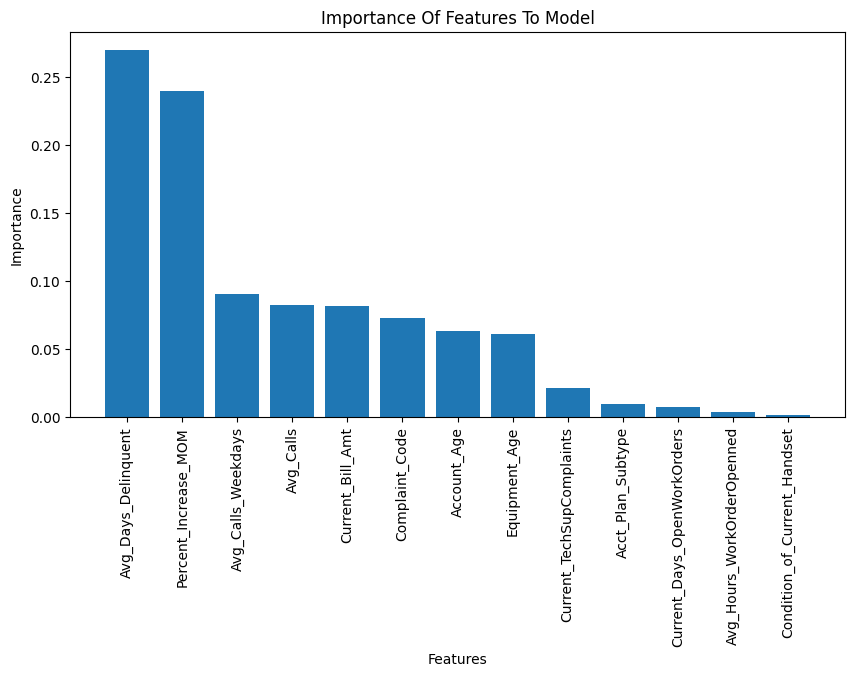

In [86]:
#plot feature importance
plt.figure(figsize=(10,5))
plt.bar(x= range(0, len(fi_series.index)), height= fi_series.values)
plt.xticks(ticks=range(0, len(fi_series.index)), labels=fi_series.index, rotation = 90)
plt.title("Importance Of Features To Model")
plt.xlabel("Features")
plt.ylabel("Importance")


In [87]:
# create new dataset with 7 most important features to predict customer churn
important_features = fi_series.index[:7].to_list()

In [93]:
# filtered x data 
x_train_filtered = x_train[important_features]
x_test_filtered = x_test[important_features]


In [98]:
#create scaler instance
scaler_2 = StandardScaler()

#fit and transform x data sets
scaler_2.fit(x_train_filtered)
x_train_tf_scaled = scaler_2.transform(x_train_filtered)
x_test_tf_scaled = scaler_2.transform(x_test_filtered)

In [99]:
#build and train logistic regresssion model with filtered x dataset
lgr2 = LogisticRegression()
lgr2.fit(x_train_tf_scaled , y_train)

LogisticRegression()

In [100]:
#predict y values for x testing data
y_pred3 = lgr2.predict(x_test_tf_scaled)

In [103]:
#use sklearn.score() function to measure how well the model predicts an outcome
lgr_score_2 = lgr2.score(x_test_tf_scaled , y_test)
print(f"LogisticRegression Model Mean Accuracy Score: {lgr_score_2}")
print(f"RMSE: {mean_squared_error(y_test, y_pred3, squared=False)} ")

LogisticRegression Model Mean Accuracy Score: 0.7536108751062022
RMSE: 0.49637599145586986 


In [104]:
final_rfc = RandomForestClassifier(random_state=1)
final_rfc.fit(x_train_tf_scaled, y_train)
rfc_score = final_rfc.score(x_test_tf_scaled, y_test)
y_pred_4 = final_rfc.predict(x_test_tf_scaled)
print(f"Random Forest Classifier Model Mean Accuracy Score: {rfc_score}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_4, squared=False)} ")

Random Forest Classifier Model Mean Accuracy Score: 0.8071367884451996
RMSE: 0.43916194228871924 


# Result

Predicting Customer Churn in a telecommunication company is important because it can help prevent or mitigate the amount of churn and increase revenue by retaining customers. 

### Factors for Churn: 

The three most important features in predicting customer churn are the 
- "average amount of days the account is deliquent"
- "percent increase of Month over Month"
- "average amount of calls made during the weekdays"

Understanding these factors of churn can also help the marketing team use their budget wisely to target potential churners. 

### Model Performance

Using a Random Forest Classifier algorithm and 7 key metrics, the model obtained a 80% accuracy score.

This fairly accurate model can help this telecommunication company increase its remove by prediciting potential customers who might churn and market them to stay. This is possible by reducing the rate of existing customers churning to less than the rate of new customers joining, thus growing the total population of customers and increase spending on company goods/services, thereby increasing revenue. 



## Implementation

In [ ]:
#a function to record and save data for a  customer
def input_customer_data():
    name = input("Enter your first name:").lower()
    
    data_list = []

    Avg_Days_Delinquent = float(input("Avg_Days_Delinquent:"))
    data_list.append(Avg_Days_Delinquent)

    Percent_Increase_MOM = float(input("Percent_Increase_MOM:"))
    data_list.append(Percent_Increase_MOM)

    Avg_Calls_Weekdays = float(input("Avg_Calls_Weekdays:"))
    data_list.append(Avg_Calls_Weekdays)

    Avg_Calls = float(input("Avg_Calls:"))
    data_list.append(Avg_Calls)

    Current_Bill_Amt = float(input("Current_Bill_Amt:"))
    data_list.append(Current_Bill_Amt)

    Complaint_Code = int(input("Complaint_Code:"))
    data_list.append(Complaint_Code)

    Account_Age = int(input("Account_Age:"))
    data_list.append(Account_Age)

    data_list = [data_list]

    return name, data_list

In [ ]:
# input data in this order [19.09, -0.28, 37545.58, 9354.21, 20176.34, 1, 25]
data = input_customer_data()
data

In [ ]:
#a function to predict whether one particular customer will churn or not
def predict_customer_churn(data):
    if final_rfc.predict(data[1]) == 0:
        result = "We predict the customer will NOT churn"
    elif final_rfc.predict(data[1]) == 1:
        result = "We predict the customer WILL churn"
    
    return result

In [ ]:
predict_customer_churn(data)